In [1]:
from sklearn import linear_model
from arftools import *
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path
from random import shuffle

## Load USPS data

In [2]:
data_folder = Path("usps_data")
usps_train_file, usps_test_file = data_folder / "USPS_train.txt", data_folder / "USPS_test.txt"

In [3]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    
def oneVone(lab1,lab2,train_data, test_data, train_lab, test_lab):
    d_train = pd.DataFrame(data = train_lab, columns=["label"])
    d_test = pd.DataFrame(data = test_lab, columns=["label"])
    
    #indexes train
    index_lab1_train = d_train[d_train["label"]==lab1].index
    index_lab2_train = d_train[d_train["label"]==lab2].index
    ind_train = np.concatenate((index_lab1_train,index_lab2_train))
    
    #indexes test
    index_lab1_test = d_test[d_test["label"]==lab1].index
    index_lab2_test = d_test[d_test["label"]==lab2].index
    ind_test = np.concatenate((index_lab1_test,index_lab2_test))

    train_indexes = sorted(ind_train, key=lambda k: random.random())
    test_indexes = sorted(ind_test, key=lambda k: random.random())

    #Données de train + labels
    trainx = np.array([train_data[i] for i in train_indexes])
    trainy = np.array([1 if train_lab[i] == lab1 else -1 for i in train_indexes]) #1 => label=lab1, -1 => label=lab2

    #Données de test + labels
    testx = np.array([test_data[i] for i in test_indexes])
    testy = np.array([1 if test_lab[i] == lab1 else -1 for i in test_indexes])
    
    return trainx, trainy, testx, testy

def plot_frontiere_proba(data, f, step =20):
    grid, x, y=make_grid(data=data, step=step)
    plt.contour(x, y, f(grid).reshape(x.shape),255)

## Perceptron

In [4]:
from sklearn.linear_model import Perceptron

- données artificielles 2D

In [5]:
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy =  gen_arti(nbex=1000,data_type=0,epsilon=1)

error train: 0.83, error test: 0.856


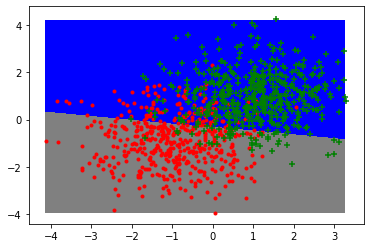

In [6]:
#Linear model
model = Perceptron()
model.fit(trainx,trainy)
print(f"error train: {model.score(trainx, trainy)}, error test: {model.score(testx,testy)}")

plt.figure()
plot_frontiere(trainx,model.predict,200)
plot_data(trainx,trainy)

error train: 0.88, error test: 0.909


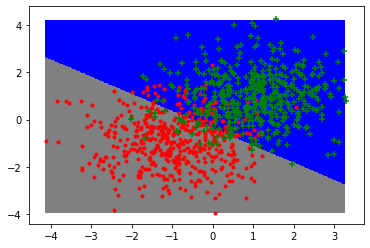

In [7]:
#Penalize linear model
penalize_model = Perceptron(penalty = "l2")
penalize_model.fit(trainx,trainy)
print(f"error train: {penalize_model.score(trainx, trainy)}, error test: {penalize_model.score(testx,testy)}")

plt.figure()
plot_frontiere(trainx,penalize_model.predict,200)
plot_data(trainx,trainy)

- USPS data 6 vs 9

In [8]:
usps_train, usps_test = load_usps(usps_train_file), load_usps(usps_test_file)
train_labels, test_labels = usps_train[1], usps_test[1]
train_data, test_data = usps_train[0], usps_test[0]

print("nb classes ->",len(np.unique(train_labels)))
print(f"nb train data ->{len(train_data)}\nnb test data -> {len(test_data)} ")

nb classes -> 10
nb train data ->7291
nb test data -> 2007 


In [9]:
data69_train, data69_train_labels, data69_test, data69_test_labels = oneVone(6,9,train_data,test_data,train_labels,test_labels)

In [10]:
#Linear model
model = Perceptron()
model.fit(data69_train,data69_train_labels)
print(f"error train: {model.score(data69_train, data69_train_labels)}, error test: {model.score(data69_test,data69_test_labels)}")

error train: 1.0, error test: 0.9971181556195965


In [11]:
#penalized linear model
model_penalized = Perceptron(penalty = "l2")
model_penalized.fit(data69_train,data69_train_labels)
print(f"error train: {model_penalized.score(data69_train, data69_train_labels)}, error test: {model_penalized.score(data69_test,data69_test_labels)}")

error train: 1.0, error test: 0.9942363112391931


## SVM et GridSearch

In [12]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [13]:
#Grille de paramètres
liste_C = [0.0001, 0.01, 0.1, 1, 100, 1000]
liste_Gamma = [0.0001, 0.001, 0.005, 0.1, 1, 3]
liste_Deg = [1,2,3,4,5]

### linear Kernel

In [14]:
#Données USPS
#Param C

for c in liste_C:
    linear_svc = svm.SVC(C = c, probability = True, kernel='linear')
    linear_svc.fit(data69_train,data69_train_labels)
    print(f"C: {c}")
    print(f"error train: {linear_svc.score(data69_train,data69_train_labels)}, error test: {linear_svc.score(data69_test,data69_test_labels)}\n")
    print(f"nb de vecteurs support: {linear_svc.support_vectors_.shape[0]}")
    print("------------------------------")

C: 0.0001
error train: 0.9969418960244648, error test: 0.9942363112391931

nb de vecteurs support: 577
------------------------------
C: 0.01
error train: 1.0, error test: 0.9971181556195965

nb de vecteurs support: 56
------------------------------
C: 0.1
error train: 1.0, error test: 0.9971181556195965

nb de vecteurs support: 43
------------------------------
C: 1
error train: 1.0, error test: 0.9971181556195965

nb de vecteurs support: 43
------------------------------
C: 100
error train: 1.0, error test: 0.9971181556195965

nb de vecteurs support: 43
------------------------------
C: 1000
error train: 1.0, error test: 0.9971181556195965

nb de vecteurs support: 43
------------------------------


C est la pondération des variables ressorts. Plus C est grand, plus les mauvaises classifications et leur écarts aux marges auront du poid dans le coût à minimiser lors de l'optimisation du SVM.

Ainsi, plus C est petit, plus le model autorise les erreurs de classifications et plus il y a de points potentiels sur la marge ou mal classés. Or ce sont ces points qui sont utilisés comme vecteurs supports.

### Gaussian Kernel

- Données arti 2D + visualisation

In [15]:
gscArtiG = GridSearchCV(
        estimator=svm.SVC(kernel='rbf', probability=True),
        param_grid={
            'C': liste_C,
            'gamma': liste_Gamma
        },scoring='neg_mean_squared_error', verbose=1)

grid_result = gscArtiG.fit(trainx, trainy)
best_params = grid_result.best_params_

best_svc_artiG = svm.SVC(kernel='rbf',probability=True, C=best_params["C"], gamma=best_params["gamma"], verbose=0)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   13.0s finished


Parameters -> C: 0.01 Gamma:  0.1
error train: 0.902, error test: 0.902

nb de vecteurs support: 694


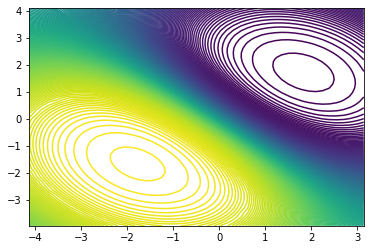

In [18]:
best_svc_artiG.fit(trainx,trainy)
print("Parameters -> C:",best_params["C"],"Gamma: ",best_params["gamma"])
print(f"error train: {best_svc_artiG.score(trainx, trainy)}, error test: {best_svc_artiG.score(trainx,trainy)}\n")
print(f"nb de vecteurs support: {best_svc_artiG.support_vectors_.shape[0]}")

plot_frontiere_proba(trainx, lambda x:best_svc_artiG.predict_proba(x)[:,0],step =50)

- Données USPS

In [19]:
#Données USPS
#Param C
for c in liste_C:
    gaussian_svc = svm.SVC(C = c, probability = True, kernel='rbf')
    gaussian_svc.fit(data69_train,data69_train_labels)
    print(f"C: {c}")
    print(f"error train: {gaussian_svc.score(data69_train,data69_train_labels)}, error test: {gaussian_svc.score(data69_test,data69_test_labels)}\n")
    print(f"nb de vecteurs support: {gaussian_svc.support_vectors_.shape[0]}")
    print("------------------------------")

C: 0.0001
error train: 0.5076452599388379, error test: 0.4899135446685879

nb de vecteurs support: 1288
------------------------------
C: 0.01
error train: 0.9946483180428135, error test: 0.9971181556195965

nb de vecteurs support: 953
------------------------------
C: 0.1
error train: 1.0, error test: 0.9971181556195965

nb de vecteurs support: 263
------------------------------
C: 1
error train: 1.0, error test: 0.9971181556195965

nb de vecteurs support: 113
------------------------------
C: 100
error train: 1.0, error test: 0.9971181556195965

nb de vecteurs support: 109
------------------------------
C: 1000
error train: 1.0, error test: 0.9971181556195965

nb de vecteurs support: 109
------------------------------


In [34]:
#Param Gamma
for g in liste_Gamma:
    gaussian_svc = svm.SVC(C = 1, gamma = g, probability = True, kernel='rbf')
    gaussian_svc.fit(data69_train,data69_train_labels)
    print(f"Gamma: {g}")
    print(f"error train: {gaussian_svc.score(data69_train,data69_train_labels)}, error test: {gaussian_svc.score(data69_test,data69_test_labels)}\n")
    print(f"nb de vecteurs support: {gaussian_svc.support_vectors_.shape[0]}")
    print("------------------------------")

Gamma: 0.0001
error train: 0.9969418960244648, error test: 0.9942363112391931

nb de vecteurs support: 389
------------------------------
Gamma: 0.001
error train: 0.9992354740061162, error test: 1.0

nb de vecteurs support: 117
------------------------------
Gamma: 0.005
error train: 1.0, error test: 0.9971181556195965

nb de vecteurs support: 94
------------------------------
Gamma: 0.1
error train: 1.0, error test: 0.8674351585014409

nb de vecteurs support: 1276
------------------------------
Gamma: 1
error train: 1.0, error test: 0.4899135446685879

nb de vecteurs support: 1308
------------------------------
Gamma: 3
error train: 1.0, error test: 0.4899135446685879

nb de vecteurs support: 1308
------------------------------
Gamma: 5
error train: 1.0, error test: 0.4899135446685879

nb de vecteurs support: 1308
------------------------------


In [29]:
gsc_USPS_G = GridSearchCV(
        estimator=svm.SVC(kernel='rbf', probability=True),
        param_grid={
            'C': liste_C,
            'gamma': liste_Gamma
        },scoring='neg_mean_squared_error', verbose=1)

grid_result = gsc_USPS_G.fit(data69_train, data69_train_labels)
best_params = grid_result.best_params_

best_svc_USPS_G = svm.SVC(kernel='rbf',probability=True, C=best_params["C"], gamma=best_params["gamma"], verbose=0)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  3.5min finished


In [28]:
best_svc_USPS_G.fit(data69_train,data69_train_labels)
print("Parameters -> C:",best_params["C"],"Gamma: ",best_params["gamma"])
print(f"error train: {best_svc_USPS_G.score(data69_train, data69_train_labels)}, error test: {best_svc_USPS_G.score(data69_test,data69_test_labels)}\n")
print(f"nb de vecteurs support: {best_svc_USPS_G.support_vectors_.shape[0]}")

KeyError: 'gamma'

### Polynomial Kernel

- Données arti 2D

In [22]:
for d in liste_Deg:
    polynomial_svc = svm.SVC(kernel='poly', degree = d)
    polynomial_svc.fit(trainx,trainy)
    print(f"Degree: {d}")
    print(f"error train: {polynomial_svc.score(trainx, trainy)}, error test: {polynomial_svc.score(testx,testy)}")
    print(f"nb de vecteurs support: {polynomial_svc.support_vectors_.shape[0]}")
    print("------------------------------")

Degree: 1
error train: 0.903, error test: 0.924
nb de vecteurs support: 249
------------------------------
Degree: 2
error train: 0.525, error test: 0.503
nb de vecteurs support: 984
------------------------------
Degree: 3
error train: 0.899, error test: 0.912
nb de vecteurs support: 337
------------------------------
Degree: 4
error train: 0.506, error test: 0.503
nb de vecteurs support: 992
------------------------------
Degree: 5
error train: 0.878, error test: 0.893
nb de vecteurs support: 422
------------------------------


In [24]:
gsc_artiP = GridSearchCV(
        estimator=svm.SVC(kernel='poly', probability=True),
        param_grid={
            'C': liste_C,
            'degree': liste_Deg
        },scoring='neg_mean_squared_error', verbose=1)

grid_result = gsc_artiP.fit(trainx, trainy)
best_params = grid_result.best_params_

best_svc_artiP = svm.SVC(kernel='rbf',probability=True, C=best_params["C"], degree=best_params["degree"], verbose=0)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.2min finished


Parameters -> C: 0.01 Degree:  1
error train: 0.904, error test: 0.904

nb de vecteurs support: 698


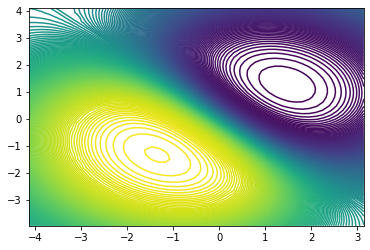

In [25]:
best_svc_artiP.fit(trainx,trainy)
print("Parameters -> C:",best_params["C"],"Degree: ",best_params["degree"])
print(f"error train: {best_svc_artiP.score(trainx, trainy)}, error test: {best_svc_artiP.score(trainx,trainy)}\n")
print(f"nb de vecteurs support: {best_svc_artiP.support_vectors_.shape[0]}")

plot_frontiere_proba(trainx, lambda x:best_svc_artiP.predict_proba(x)[:,0],step =50)

- Données USPS

In [26]:
gsc_USPS_P = GridSearchCV(
        estimator=svm.SVC(kernel='poly', probability=True),
        param_grid={
            'C': liste_C,
            'degree': liste_Deg
        },scoring='neg_mean_squared_error', verbose=1)

grid_result = gsc_USPS_P.fit(data69_train, data69_train_labels)
best_params = grid_result.best_params_

best_svc_USPS_P = svm.SVC(kernel='rbf',probability=True, C=best_params["C"], degree=best_params["degree"], verbose=0)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.3min finished


In [27]:
best_svc_USPS_P.fit(data69_train,data69_train_labels)
print("Parameters -> C:",best_params["C"],"Degree: ",best_params["degree"])
print(f"error train: {best_svc_USPS_P.score(data69_train, data69_train_labels)}, error test: {best_svc_USPS_P.score(data69_test,data69_test_labels)}\n")
print(f"nb de vecteurs support: {best_svc_USPS_G.support_vectors_.shape[0]}")

Parameters -> C: 100 Degree:  1
error train: 1.0, error test: 0.9971181556195965

nb de vecteurs support: 49


# String Kernel